# Project Work in ML 

## Ganesh Pavan Karthikeya Bharadhwaj,                  matricola: 0000976948

## Project Title : Vechicle Insurance Classifier with Imbalanced Dataset

## Problem Statement

Insurance companies that sell life, health, and property and casualty insurance are using machine learning (ML) to drive improvements in customer service, fraud detection, and operational efficiency. The data provided by an Insurance company which is not excluded from other companies to getting advantage of ML. This company provides Health Insurance to its customers. We can build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

## Task 

Here we are going to Predict whether customer is interested in vehicle insurance based on previous data.

## Objectives

1. Handling the Imbalanced dataset with popular techniques like SMOTE (Oversampling) or NearMiss (Undersampling).
2. Implement Different Machine learning models on dataset and find the best model which outperforms remaining models.
3. Fine Tuning the Best model using GridSearchCV

## Information about dataset 

Demographics (gender, age, region code type)

- Description related to the Customer information.

Vehicles (Vehicle Age, Damage)

- Information related to Vehicle.


Policy (Premium, sourcing channel)

- Information related to Vehicle Insurance and Policies.

## Features in dataset

id -> unique identity (int)

Gender -> Male/Female (object-string)

Age -> Age (int)

Driving_License -> 0/1 (binary)

Region_Code -> (int)

Previously_Insured -> 0/1 (binary)

Vehicle_Age -> (object)

Vehicle_Damage -> Yes/No (binary)

Annual_Premium -> (int)

Policy_Sales_Channel -> (int)

Vintage -> (int)

Response -> 0/1 (binary) (response)

## Work-flow : 

1. Importing Required Libraries.

2. Loading the dataset (Train/Test).

3. Exploratory Data Analysis. 
    - 3.1 Checking the missing value.
    - 3.2 Visualizations 
          1. History of Age column.
          2. Bar chart of Gender.
          3. Bar chart of Driving License.
          4. Histrogram of AnnuaL_Premium. 
          5. Bar chart of Previous_License.
          6. Bar chart of Response (Target).
4. Data Preparation.
5. Splitting the data. 
6. Handling the Imbalanced Data.

   - 6.1 SMOTE (Synthetic Minority Oversampling Technique) - Oversampling
  
        * 1.1 Model-1 (LogisticRegression)
        * 1.2 Model-2 (RandomForest)
        * 1.3 Model-3 (GradientBoosting)
        * Tunning the best model : Model-3
     
   - 6.2 NearMiss Algorithm (UnderSampling)
  
        * 1.1 Model-1 (LogisticRegression)
        * 1.2 Model-2 (RandomForest)
        * 1.3 Model-3 (GradientBoosting)
        * Tunning the best model : Model-3
   

## 1. Importing Required Libraries

In [30]:
!pip install imblearn

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier #Bagging 
from sklearn.ensemble import GradientBoostingClassifier #Boosting

#SMOTE 
from imblearn.over_sampling import SMOTE #OverSampling

#Near Miss
from imblearn.under_sampling import NearMiss #UnderSampling

#GridSearchCV
from sklearn.model_selection import GridSearchCV

Here, we have to import required libraries like pandas for data manipulations, numpy for numerical operations, matplotlib & seaborn for visualizations and Sklearn for Machine learning models, metrics and model_selection techniques. imblearn for SMOTE and NearMiss.

## 2. Loading the Dataset

In [2]:
df = pd.read_csv('Train dataset.csv')

We have to load the data using read_csv method from pandas library. 

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7,1,< 1 Year,No,2630,152,16,0
1,17163,Male,42,1,28,0,1-2 Year,Yes,43327,26,135,0
2,32023,Female,66,1,33,0,1-2 Year,Yes,35841,124,253,0
3,87447,Female,22,1,33,0,< 1 Year,No,27645,152,69,0
4,501933,Male,28,1,46,1,< 1 Year,No,29023,152,211,0


displaying top 5 rows.

In [3]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
382149,164549,Male,24,1,15,0,< 1 Year,Yes,23938,152,105,0
382150,247064,Male,27,1,28,1,< 1 Year,No,336395,152,144,0
382151,165293,Male,45,1,28,0,1-2 Year,Yes,40443,26,187,0
382152,383241,Female,28,1,28,1,< 1 Year,No,25380,152,208,0
382153,401019,Female,29,1,18,1,< 1 Year,No,30396,152,104,0


displaying last 5 rows.

## 3. Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [13]:
df.shape

(382154, 12)

We can observe that there are 382154 rows and 12 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    382154 non-null  int64 
 1   Gender                382154 non-null  object
 2   Age                   382154 non-null  int64 
 3   Driving_License       382154 non-null  int64 
 4   Region_Code           382154 non-null  int64 
 5   Previously_Insured    382154 non-null  int64 
 6   Vehicle_Age           382154 non-null  object
 7   Vehicle_Damage        382154 non-null  object
 8   Annual_Premium        382154 non-null  int64 
 9   Policy_Sales_Channel  382154 non-null  int64 
 10  Vintage               382154 non-null  int64 
 11  Response              382154 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 35.0+ MB


displaying information of dataset.

**We can observe that there are 3 Categorical Features and 9 Numerical Feature in our dataset.**

In [8]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

These are the 12 columns.

In [9]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Here we can observe that data is not standarized. because each column has different mean and different standard deviation.

### 3.1 Checking for the Missing Values

In [16]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

We can observe that there are no missing values.

## 3.2 Visualizations

### Histogram for Age column

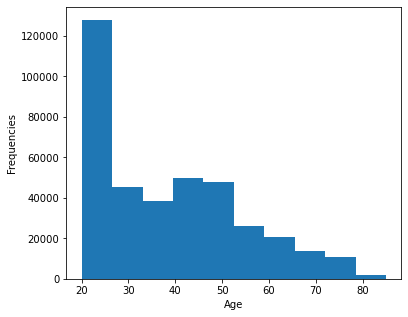

In [24]:
plt.figure(figsize=(6,5))
plt.hist(df.Age)
plt.xlabel("Age")
plt.ylabel("Frequencies")
plt.show()

### Distribution of Age column

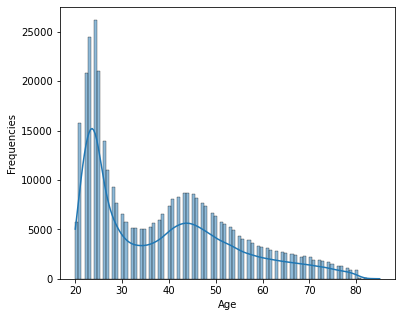

In [26]:
plt.figure(figsize=(6,5))
sns.histplot(df.Age,kde=True)
plt.xlabel("Age")
plt.ylabel("Frequencies")
plt.show()

We can observe that distribution is bimodal. that means there are high range of people at age of 20-30 and 40-60 in our dataset.

### Bar Chart of Gender

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


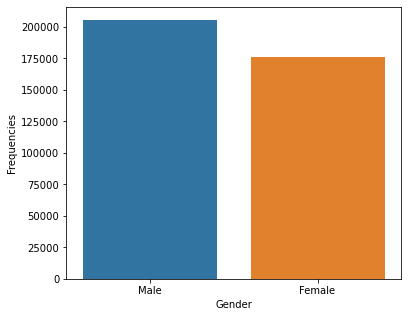

In [5]:
plt.figure(figsize=(6,5))
sns.countplot(df.Gender)
plt.xlabel("Gender")
plt.ylabel("Frequencies")
plt.show()

In [30]:
df.Gender.value_counts()

Male      205603
Female    176551
Name: Gender, dtype: int64

We can observe that there are 205603 Male and 176551 Female.

### Bar Chart of Driving License

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


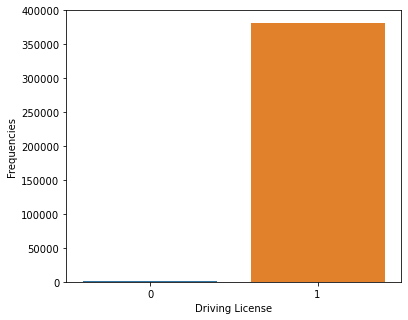

In [6]:
plt.figure(figsize=(6,5))
sns.countplot(df.Driving_License)
plt.xlabel("Driving License")
plt.ylabel("Frequencies")
plt.show()

In [34]:
df.Driving_License.value_counts()

1    381431
0       723
Name: Driving_License, dtype: int64

We can observe that there are 381431 people who have Driving License and 723 people who doesn't have Driving License.

### Bar Chart of Previously Insured

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


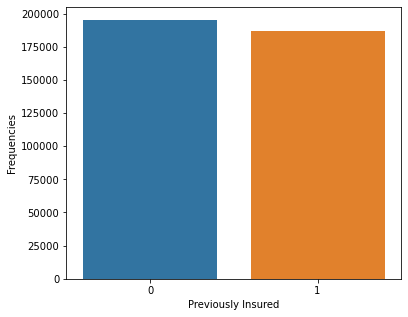

In [7]:
plt.figure(figsize=(6,5))
sns.countplot(df.Previously_Insured)
plt.xlabel("Previously Insured")
plt.ylabel("Frequencies")
plt.show()

In [36]:
df.Previously_Insured.value_counts()

0    195211
1    186943
Name: Previously_Insured, dtype: int64

We can observe that there 195211 people who doesn't have previous Insurance and 186943 people who have previous Insurance.

### Bar Chart of Vehicle Age

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


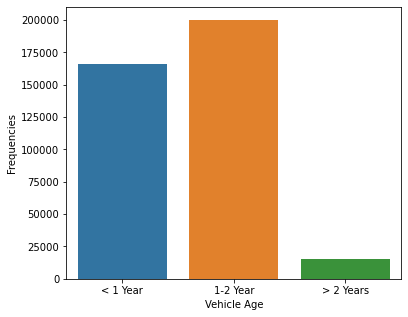

In [45]:
plt.figure(figsize=(6,5))
sns.countplot(df.Vehicle_Age)
plt.xlabel("Vehicle Age")
plt.ylabel("Frequencies")
plt.show()

In [40]:
df.Vehicle_Age.value_counts()

1-2 Year     200176
< 1 Year     166353
> 2 Years     15625
Name: Vehicle_Age, dtype: int64

We can observe that there are 200176 of Vehicles that have age of 1-2 Year inbetween and 166353 of vehicles that have age of have age of less than 1 year and 15625 of vehicles that have age of greater than 2 years. 

### Barchart of Vehicle Damage

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


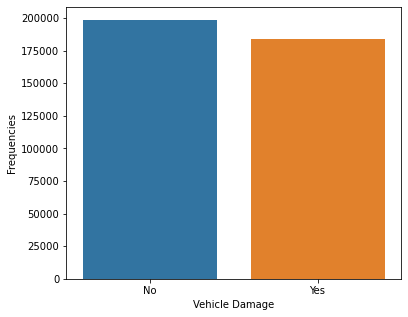

In [44]:
plt.figure(figsize=(6,5))
sns.countplot(df.Vehicle_Damage)
plt.xlabel("Vehicle Damage")
plt.ylabel("Frequencies")
plt.show()

In [43]:
df.Vehicle_Damage.value_counts()

No     198501
Yes    183653
Name: Vehicle_Damage, dtype: int64

We can observe that there are 198501 Vehicle which are not damaged and 183653 vechicle which are damaged.

### Histrogram of Annual_Premium

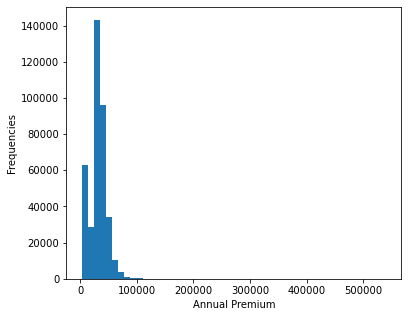

In [11]:
plt.figure(figsize=(6,5))
plt.hist(df.Annual_Premium,bins=50)
plt.xlabel("Annual Premium")
plt.ylabel("Frequencies")
plt.show()

### Barchart of Response

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


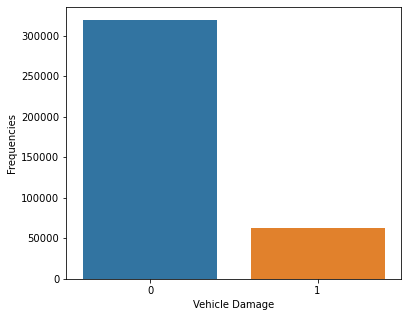

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(df.Response)
plt.xlabel("Vehicle Damage")
plt.ylabel("Frequencies")
plt.show()

In [13]:
df.Response.value_counts()

0    319553
1     62601
Name: Response, dtype: int64

**We can observe that target is highly imbalance. so we have to handle the imbalance of dataset.**

## 4. Data preparation

In [4]:
x = df.drop('Response',axis=1)
x.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,167647,Male,22,1,7,1,< 1 Year,No,2630,152,16
1,17163,Male,42,1,28,0,1-2 Year,Yes,43327,26,135


Here we can observe that there are some categorial feature. firstly I have to convert them into Numerical features. 

In [5]:
x = pd.get_dummies(x,['Gender','Vehicle_Age','Vehicle_Damage'])

In [6]:
x.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,167647,22,1,7,1,2630,152,16,0,1,0,1,0,1,0
1,17163,42,1,28,0,43327,26,135,0,1,1,0,0,0,1
2,32023,66,1,33,0,35841,124,253,1,0,1,0,0,0,1
3,87447,22,1,33,0,27645,152,69,1,0,0,1,0,1,0
4,501933,28,1,46,1,29023,152,211,0,1,0,1,0,1,0


We have succefully converted all feature into numerical features.

In [7]:
y = df.Response
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

## 5. Splitting the data

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print("Training set :",x_train.shape, y_train.shape)
print("Testing set :",x_test.shape,y_test.shape)

Training set : (267507, 15) (267507,)
Testing set : (114647, 15) (114647,)


# Training the model with Imbalance dataset

Here, we are going with train the model with Imbalance dataset. 

In [9]:
#instantiation of model
log_model_imbalanced = LogisticRegression()

#training the model
log_model_imbalanced.fit(x_train,y_train)

#predictions
pred_imb = log_model_imbalanced.predict(x_test)

In [10]:
accuracy_score(y_test,pred_imb)

0.8339075597268136

**Accuracy is not a good metric when our dataset is imbalanced.**

In [27]:
print(classification_report(y_test,pred_imb))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     95953
           1       0.38      0.03      0.05     18694

    accuracy                           0.83    114647
   macro avg       0.61      0.51      0.48    114647
weighted avg       0.76      0.83      0.77    114647



**We can observe that class 1 has minority class. It proves that the model is more biased towards the majority class. that why it has low precision and recall, obviously F1-score will be penalized. So we have to hand the Imbalance dataset.**

## 6. Handling Imbalance dataset

# 1) SMOTE (Synthetic Minority Oversampling Technique) - Oversampling

**SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.**

At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector

In [10]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, count of label '1': 43907
Before OverSampling, count of label '0': 223600


In [9]:
smote = SMOTE(random_state=2)
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

In [12]:
print("After OverSampling, count of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, count of label '0': {}".format(sum(y_train_sm == 0)))

After OverSampling, count of label '1': 223600
After OverSampling, count of label '0': 223600


C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


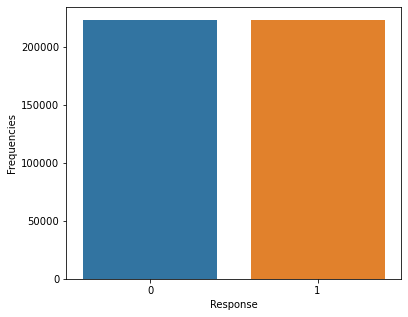

In [10]:
plt.figure(figsize=(6,5))
sns.countplot(y_train_sm)
plt.xlabel("Response")
plt.ylabel("Frequencies")
plt.show()

We can observe that now our target is balanced.

## 1.1 Model-1 (LogisticRegression)

In [15]:
log_model_smote =  LogisticRegression()

In [16]:
log_model_smote.fit(x_train_sm, y_train_sm)

LogisticRegression()

In [17]:
pred_log_smote = log_model_smote.predict(x_test)

### Metrics for Evaluating the model

In [18]:
accuracy_score(y_test,pred_log_smote)

0.6571214248955489

In [19]:
print(classification_report(y_test,pred_log_smote))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76     95953
           1       0.27      0.65      0.38     18694

    accuracy                           0.66    114647
   macro avg       0.59      0.65      0.57    114647
weighted avg       0.80      0.66      0.70    114647



## 1.2 Model-2 (RandomForest)

In [50]:
random_model_smote = RandomForestClassifier()

#training model
random_model_smote.fit(x_train_sm,y_train_sm)

#predictions
pred_rndf_smote = random_model_smote.predict(x_test)

RandomForestClassifier()

### Metrics for Evaluating the model

In [52]:
accuracy_score(y_test,pred_rndf_smote)

0.8759496541558

In [54]:
print(classification_report(y_test,pred_rndf_smote))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     95953
           1       0.65      0.52      0.58     18694

    accuracy                           0.88    114647
   macro avg       0.78      0.73      0.75    114647
weighted avg       0.87      0.88      0.87    114647



## 1.3 Model-3 (GradientBoosting)

In [20]:
grad_boost_smote = GradientBoostingClassifier()

#training the model
grad_boost_smote.fit(x_train_sm,y_train_sm)

#predictions
pred_grad_boost_smote = grad_boost_smote.predict(x_test)

### Metrics for Evaluating the model

In [21]:
accuracy_score(y_test,pred_grad_boost_smote)

0.8596736068104704

In [22]:
print(classification_report(y_test,pred_grad_boost_smote))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     95953
           1       0.57      0.60      0.58     18694

    accuracy                           0.86    114647
   macro avg       0.74      0.76      0.75    114647
weighted avg       0.86      0.86      0.86    114647



## Tunning the best model : Model-3 

In [11]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [10],
                  'max_depth'    : [4,6,8,10]
                 }

These are the parameters of Gradient Boosting.

In [13]:
%%time
gradboost_grid_smote = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,n_jobs=-1)

gradboost_grid_smote.fit(x_train_sm,y_train_sm)

Wall time: 7min 52s


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10], 'n_estimators': [10],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [15]:
 gradboost_grid_smote.best_params_

{'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 10, 'subsample': 0.2}

In [16]:
gradboost_grid_smote.best_score_

0.8840049194991055

In [17]:
gradboost_grid_smote.best_estimator_

GradientBoostingClassifier(learning_rate=0.03, max_depth=10, n_estimators=10,
                           subsample=0.2)

## Train the model with Best params

In [19]:
best_params_smote = GradientBoostingClassifier(learning_rate=0.03, max_depth=10, n_estimators=10,subsample=0.2)

best_params_smote.fit(x_train_sm,y_train_sm)

GradientBoostingClassifier(learning_rate=0.03, max_depth=10, n_estimators=10,
                           subsample=0.2)

In [20]:
pred_gradboost_grid_smote = best_params_smote.predict(x_test)

In [21]:
accuracy_score(y_test,pred_gradboost_grid_smote)

0.8723909042539273

In [22]:
print(classification_report(y_test,pred_gradboost_grid_smote))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     95953
           1       0.63      0.53      0.57     18694

    accuracy                           0.87    114647
   macro avg       0.77      0.73      0.75    114647
weighted avg       0.87      0.87      0.87    114647



# 2) NearMiss Algorithm (UnderSampling)

**Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.**

* There are three versions of the technique, named NearMiss-1, NearMiss-2, and NearMiss-3.

  - NearMiss-1 selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class.
  - NearMiss-2 selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class. 
  - NearMiss-3 involves selecting a given number of majority class examples for each example in the minority class that are closest.


* Here, distance is determined in feature space using Euclidean distance or similar.

NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
NearMiss-3: Majority class examples with minimum distance to each minority class example.
The NearMiss-3 seems desirable, given that it will only keep those majority class examples that are on the decision boundary.

In [60]:
print("Before UnderSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, count of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, count of label '1': 43907
Before OverSampling, count of label '0': 223600


In [24]:
near_miss = NearMiss()

In [25]:
x_train_nm, y_train_nm = near_miss.fit_resample(x_train,y_train)

In [63]:
print("After UnderSampling, count of label '1': {}".format(sum(y_train_nm == 1)))
print("After UnderSampling, count of label '0': {}".format(sum(y_train_nm == 0)))

After OverSampling, count of label '1': 43907
After OverSampling, count of label '0': 43907


We can observe that now our dataset is balanced. we undersampled the dataset from majority class and make equal with minority class. 

C:\Users\karth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


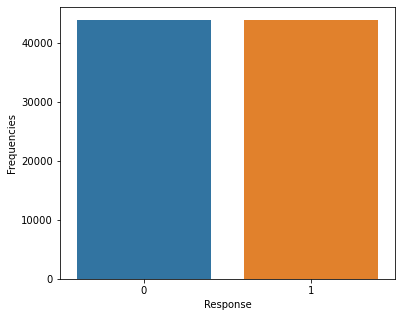

In [64]:
plt.figure(figsize=(6,5))
sns.countplot(y_train_nm)
plt.xlabel("Response")
plt.ylabel("Frequencies")
plt.show()

## 2.1 Model-1 (LogisticRegression)

In [67]:
log_model_nm = LogisticRegression()

#training the model 
log_model_nm.fit(x_train_nm,y_train_nm)

#predictions 
pred_log_nearmiss = log_model_nm.predict(x_test)

C:\Users\karth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Metrics for Evaluating the model

In [68]:
accuracy_score(y_test,pred_log_nearmiss)

0.34056713215347983

In [69]:
print(classification_report(y_test,pred_log_nearmiss))

              precision    recall  f1-score   support

           0       0.87      0.25      0.39     95953
           1       0.17      0.81      0.29     18694

    accuracy                           0.34    114647
   macro avg       0.52      0.53      0.34    114647
weighted avg       0.76      0.34      0.37    114647



## 2.2 Model-2 (RandomForest)

In [72]:
random_model_nearmiss = RandomForestClassifier()

#training the model
random_model_nearmiss.fit(x_train_nm,y_train_nm)

#predictions
pred_random_nearmiss = random_model_nearmiss.predict(x_test)

### Metrics for Evaluating the model

In [73]:
accuracy_score(y_test,pred_random_nearmiss)

0.7159280225387494

In [74]:
print(classification_report(y_test,pred_random_nearmiss))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80     95953
           1       0.35      0.89      0.50     18694

    accuracy                           0.72    114647
   macro avg       0.66      0.79      0.65    114647
weighted avg       0.87      0.72      0.75    114647



## 2.3 Model-3 (Gradient Boosting)

In [79]:
grad_boost_nearmiss = GradientBoostingClassifier()

#train the model
grad_boost_nearmiss.fit(x_train_nm,y_train_nm)

#predictions 
pred_grad_boost_nearmiss = grad_boost_nearmiss.predict(x_test)

### Metrics for Evaluating the model

In [80]:
accuracy_score(y_test,pred_grad_boost_nearmiss)

0.7058623426692369

In [81]:
print(classification_report(y_test,pred_grad_boost_nearmiss))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79     95953
           1       0.34      0.88      0.49     18694

    accuracy                           0.71    114647
   macro avg       0.65      0.78      0.64    114647
weighted avg       0.86      0.71      0.74    114647



## Tuning the Best Model : Model-3

In [23]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [10],
                  'max_depth'    : [4,6,8,10]
                 }

In [27]:
%%time
gradboost_grid_nearmiss = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,n_jobs=-1)

gradboost_grid_nearmiss.fit(x_train_nm,y_train_nm)

Wall time: 59.2 s


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10], 'n_estimators': [10],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [28]:
gradboost_grid_nearmiss.best_estimator_

GradientBoostingClassifier(learning_rate=0.03, max_depth=6, n_estimators=10,
                           subsample=0.1)

In [29]:
gradboost_grid_nearmiss.best_params_

{'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 10, 'subsample': 0.1}

In [30]:
gradboost_grid_nearmiss.best_score_

0.9153086943197243

In [34]:
best_params_grad_nearmiss = gradboost_grid_nearmiss.predict(x_test)

In [36]:
accuracy_score(y_test, best_params_grad_nearmiss)

0.7172625537519517

In [37]:
print(classification_report(y_test,best_params_grad_nearmiss))

              precision    recall  f1-score   support

           0       0.97      0.69      0.80     95953
           1       0.35      0.88      0.50     18694

    accuracy                           0.72    114647
   macro avg       0.66      0.78      0.65    114647
weighted avg       0.87      0.72      0.75    114647



# Conclusion



We can observe that Models with SMOTE Oversampled dataset got best results when compared to Nearmiss undersampled dataset. **(May be In Nearmiss technique we are lossing information by reducing the majority class sample to make them equivalent with minority class samples. We can't conclude that It's depends on the dataset).** 

* **Model-1 :**

Random Forest model with SMOTE oversampled dataset outperformed remaining models with

**Accuracy: 88%, F1-score for 0 class : 0.93  and F1-score for 1 class: 0.58** 



* **Model-2 :**

Gradient Boosting model with SMOTE oversampled dataset outperformed remaining models with

**Accuracy: 87%, F1-score for 0 class : 0.92  and F1-score for 1 class: 0.57** 
